In [1]:
from pyspark.sql import SparkSession

nyc_taxi_challenge_path = '../../nyc-taxi-challenge/'

spark = SparkSession.builder.appName("NYC Taxi Challenge").getOrCreate()
spark

# Exploring the datasets

## Trips from 2009

This dataset has informations about taxi trips of 2009

In [2]:
json_2011_trips = nyc_taxi_challenge_path + 'datasets/data-sample_data-nyctaxi-trips-2012-json_corrigido.json'
#json_trips = nyc_taxi_challenge_path + 'datasets/data-sample_data-nyctaxi-trips-*'
trips_df = spark.read.json(json_2011_trips)

trips_df.limit(100).toPandas()

,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,rate_code,store_and_fwd_flag,surcharge,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id
0,2012-06-09T16:31:19.862787+00:00,40.747950,-73.994712,5.4,2,Cash,2012-06-09T16:21:13.580003+00:00,40.742950,-74.004114,None,None,0.0,0.00,0.00,5.40,0.80,CMT
1,2012-08-14T21:54:50.01863+00:00,40.792385,-73.940449,15.4,1,Cash,2012-08-14T21:44:14.940659+00:00,40.747784,-73.996506,None,None,0.0,0.00,0.00,15.40,5.40,CMT
2,2012-07-06T17:22:57.404442+00:00,40.768108,-73.944535,6.1,5,CASH,2012-07-06T17:12:07.862531+00:00,40.752070,-73.951340,None,None,1.0,0.00,0.00,7.10,1.67,VTS
3,2012-07-22T04:20:45.142945+00:00,40.721812,-73.958122,12.9,1,CASH,2012-07-22T04:12:28.704958+00:00,40.729128,-74.001117,None,None,0.5,0.00,0.00,13.40,4.13,VTS
4,2012-07-11T11:49:03.034108+00:00,40.776075,-73.979757,7.7,1,CASH,2012-07-11T11:40:13.77461+00:00,40.756873,-73.976600,None,None,0.5,0.00,0.00,8.20,2.03,VTS
5,2012-09-18T08:11:57.381861+00:00,40.750478,-73.978623,6.5,1,CASH,2012-09-18T08:04:16.536019+00:00,40.750528,-73.994665,None,None,0.0,0.00,0.00,6.50,1.15,VTS
6,2012-07-28T06:10:05.57054+00:00,40.774042,-73.870838,22.1,1,CASH,2012-07-28T06:04:10.057143+00:00,40.772843,-73.955462,None,None,0.0,0.00,4.15,26.25,8.61,VTS
7,2012-03-06T09:17:08.719709+00:00,40.759317,-73.985112,5.7,5,Credit,2012-03-06T09:05:40.958118+00:00,40.757998,-73.976158,None,None,0.0,2.00,0.00,7.70,0.84,VTS
8,2012-03-28T19:54:01.039056+00:00,40.761585,-73.975072,6.1,2,CASH,2012-03-28T19:46:58.45386+00:00,40.764408,-73.988585,None,None,0.0,0.00,0.00,6.10,1.04,VTS
9,2012-10-17T11:43:49.819286+00:00,40.747330,-73.993722,3.7,5,CASH,2012-10-17T11:28:59.571708+00:00,40.740683,-74.001978,None,None,0.0,0.00,0.00,3.70,0.75,VTS


## Payment lookup

This one is of payment lookup's:

In [3]:
from pyspark.sql.functions import col

csv_payment_lookup = nyc_taxi_challenge_path + 'datasets/data-payment_lookup-csv.csv'
payment_lookup_df = (
    spark.read
        .format('csv')
        .option('header', True)
        .load(csv_payment_lookup)
        .filter(col('A') != 'payment_type')
        .withColumnRenamed('A', 'payment_type')
        .withColumnRenamed('B', 'payment_lookup')
)

payment_lookup_df.limit(100).toPandas()

,payment_type,payment_lookup
0,Cas,Cash
1,CAS,Cash
2,Cre,Credit
3,CRE,Credit
4,No,No Charge
5,Dis,Dispute
6,Cash,Cash
7,CASH,Cash
8,Credit,Credit
9,CREDIT,Credit


## Vendor lookup

This is the vendor's lookup dataset:

In [4]:
from pyspark.sql.functions import col

csv_vendor_lookup = nyc_taxi_challenge_path + 'datasets/data-vendor_lookup-csv.csv'
vendor_lookup_df = (
    spark.read
        .format('csv')
        .option('header', True)
        .load(csv_vendor_lookup)
)

vendor_lookup_df.limit(100).toPandas()

,vendor_id,name,address,city,state,zip,country,contact,current
0,CMT,"Creative Mobile Technologies, LLC",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com,Yes
1,VTS,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes
2,DDS,"Dependable Driver Service, Inc",8554 North Homestead St.,Bronx,NY,10472,USA,9778896500,Yes
3,TS,Total Solutions Co,Five Boroughs Taxi Co.,Brooklyn,NY,11229,USA,mgmt@5btc.com,Yes
4,MT,Mega Taxi,4 East Jennings St.,Brooklyn,NY,11228,USA,contact@megataxico.com,No


# Questions

Queremos que, a partir dos dados disponibilizados, você responda, de preferência com gráficos às seguintes questões:

1. Qual a distância média percorrida por viagens com no máximo 2 passageiros;
2. Quais os 3 maiores ​vendors​ em quantidade total de dinheiro arrecadado;
3. Faça um histograma da distribuição mensal, nos 4 anos, de corridas pagas em dinheiro;
4. Faça um gráfico de série temporal contando a quantidade de gorjetas de cada dia, nos últimos 3 meses de 2012.

## Distância média percorrida por viagens com no máximo 2 passageiros

In [5]:
from pyspark.sql.functions import (col, to_timestamp, to_date, date_format)
from pyspark.sql import Window

avg_distance = (
    trips_df.filter(col('passenger_count') <= 2)
        .withColumn('pickup_datetime_ts', to_timestamp(col('pickup_datetime'), "yyyy-MM-dd'T'HH:mm:ss"))
        .withColumn('pickup_date', to_date(col('pickup_datetime_ts'), 'yyyy-MM-dd'))
        .withColumn('pickup_year', date_format(col('pickup_date'), 'yyyy'))
        .select(
            col('pickup_year'),
            col('pickup_date'), 
            col('trip_distance')
        )
        .groupBy('pickup_year', 'pickup_date')
        .avg()
)
avg_distance.limit(10).toPandas()

,pickup_year,pickup_date,avg(trip_distance)
0,2012,2012-01-28,2.666913
1,2012,2012-06-14,2.610338
2,2012,2012-09-06,2.658362
3,2012,2012-09-26,2.683303
4,2012,2012-07-10,2.643057
5,2012,2012-04-28,2.646836
6,2012,2012-05-05,2.656044
7,2012,2012-04-29,2.606434
8,2012,2012-10-20,2.637253
9,2012,2012-05-15,2.589254


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_distance_pd = avg_distance.toPandas().sort_values(by=['pickup_year', 'pickup_date'])
# avg_distance_pd.plot(x='pickup_date',y='avg(trip_distance)')

def pie(v, l, color=None):
    plt.plot(l.values, v)
g = sns.FacetGrid(avg_distance_pd, col="pickup_year")
g.map(pie, "avg(trip_distance)", "pickup_date" )

plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 300x300 with 1 Axes>

## Os 3 maiores vendors em quantidade total de dinheiro arrecadado

In [7]:
from pyspark.sql.functions import (col)
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

def pickup_semester(yearMonth):
    return str(yearMonth.year) + '-' + ('1' if yearMonth.month <= 6 else '2')

pickup_semester_udf = udf(pickup_semester, StringType())

revenue_per_vendor = (
    trips_df
            .withColumn('pickup_datetime_ts', to_timestamp(col('pickup_datetime'), "yyyy-MM-dd'T'HH:mm:ss"))
            .withColumn('pickup_semester', pickup_semester_udf(to_date(col('pickup_datetime_ts'), 'yyyy-MM-dd')))
            .select(
                col('pickup_semester'),
                col('vendor_id'),
                col('total_amount')
            )
            .groupBy('vendor_id', 'pickup_semester')
            .sum()
)

revenue_per_vendor_pd = revenue_per_vendor.toPandas().sort_values(by=['pickup_semester', 'vendor_id'])
revenue_per_vendor_pd

,vendor_id,pickup_semester,sum(total_amount)
6,CMT,2012-1,2942198.56
1,DDS,2012-1,411102.50
2,VTS,2012-1,2873966.68
5,CMT,2012-2,1945072.51
4,DDS,2012-2,267622.93
0,TS,2012-2,11.40
3,VTS,2012-2,1886891.82


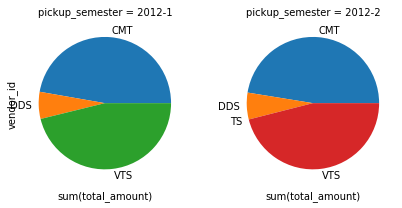

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# values = revenue_per_vendor_pd['sum(total_amount)']
# labels = revenue_per_vendor_pd['vendor_id']
# semesters = revenue_per_vendor_pd['pickup_semester']

def pie(v, l, color=None):
    plt.pie(v, labels=l.values)
g = sns.FacetGrid(revenue_per_vendor_pd, col="pickup_semester")
g.map(pie, "sum(total_amount)", "vendor_id" )

plt.show()

## Histograma da distribuição mensal (nos 4 anos) de corridas pagas em dinheiro

In [9]:
from pyspark.sql.functions import (col, lower, date_format)

monthly_cash_revenues = (
    trips_df
            .withColumn('pickup_datetime_ts', to_timestamp(col('pickup_datetime'), "yyyy-MM-dd'T'HH:mm:ss"))
            .withColumn('pickup_month', date_format(to_date(col('pickup_datetime_ts'), 'yyyy-MM'), 'yyyy-MM'))
            .withColumn('payment_type', lower(col('payment_type')))
            .filter(col('payment_type') == 'cash')
            .select(
                col('pickup_month'),
                col('total_amount')
            )
)

In [10]:
gre_histogram = (
    monthly_cash_revenues
        .filter(col('pickup_month') == '2011-03')
        .select('total_amount')
        .rdd.flatMap(lambda x: x).histogram([1,5,10,15,20,25,30,35,40,45,50,55,60])
)

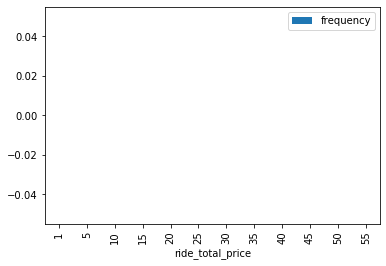

In [11]:
import pandas as pd

pd.DataFrame(
    list(zip(*gre_histogram)), 
    columns=['ride_total_price', 'frequency']
).set_index(
    'ride_total_price'
).plot(kind='bar')

## Quantidade de gorjetas por dia nos últimos 3 meses de 2012

In [12]:
from pyspark.sql.functions import (col, lower, date_format)

tips_per_day = (
    trips_df
            .withColumn('pickup_datetime_ts', to_timestamp(col('pickup_datetime'), "yyyy-MM-dd'T'HH:mm:ss"))
            .withColumn('pickup_year', date_format(to_date(col('pickup_datetime_ts'), 'yyyy-MM-dd'), 'yyyy'))
            .withColumn('pickup_month', date_format(to_date(col('pickup_datetime_ts'), 'yyyy-MM'), 'yyyy-MM'))
            .withColumn('pickup_date', to_date(col('pickup_datetime_ts'), 'yyyy-MM-dd'))
            .where(col('pickup_year') == '2012')
            .where(col('pickup_month').isin(['2012-08', '2012-09', '2012-10']))
            .select(
                col('pickup_month'),
                col('pickup_date'),
                col('tip_amount')
            )
            .groupBy('pickup_month', 'pickup_date')
            .sum()
)

tips_per_day_pd = tips_per_day.toPandas().sort_values(by=['pickup_month', 'pickup_date'])

tips_per_day_pd

,pickup_month,pickup_date,sum(tip_amount)
46,2012-08,2012-08-01,1268.04
53,2012-08,2012-08-02,1473.60
40,2012-08,2012-08-03,1315.18
74,2012-08,2012-08-04,1314.96
9,2012-08,2012-08-05,1297.76
52,2012-08,2012-08-06,1291.31
57,2012-08,2012-08-07,1499.44
72,2012-08,2012-08-08,1370.80
77,2012-08,2012-08-09,1317.54
41,2012-08,2012-08-10,1367.18


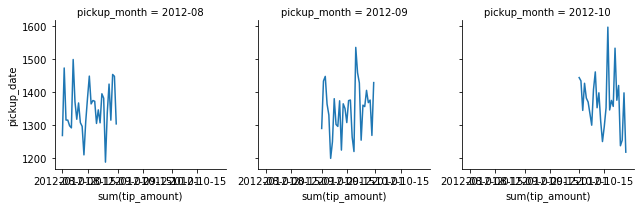

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plt_plot(v, l, color=None):
    plt.plot(l.values, v)
g = sns.FacetGrid(tips_per_day_pd, col="pickup_month")
g.map(plt_plot, "sum(tip_amount)", "pickup_date" )

plt.show()

# Bonus questions


- Qual o tempo médio das corridas nos dias de sábado e domingo;
- Fazer uma visualização em mapa com latitude e longitude de ​pickups and ​dropoffs ​no ano de 2010;
- Simular um ​streaming dos dados dos ​JSON e fazer uma visualização acompanhando uma métrica em tempo-real;
- Conseguir provisionar todo seu ambiente em uma cloud pública, de preferência ​AWS​.

## Tempo médio das corridas nos dias de sábado e domingo

In [17]:
from pyspark.sql.functions import (col, lower, date_format, to_date)

trips_on_weekend = (
    trips_df
            .withColumn('pickup_datetime_ts', to_timestamp(col('pickup_datetime'), "yyyy-MM-dd'T'HH:mm:ss"))
            .withColumn('pickup_year', date_format(to_date(col('pickup_datetime_ts'), 'yyyy-MM-dd'), 'yyyy'))
            .withColumn('pickup_month', date_format(to_date(col('pickup_datetime_ts'), 'yyyy-MM'), 'yyyy-MM'))
            .withColumn('pickup_date', to_date(col('pickup_datetime_ts'), 'yyyy-MM-dd'))
            .withColumn('pickup_dayofweek', lower(date_format(col('pickup_datetime_ts'), 'EEEE')))
            .where(col('pickup_dayofweek').isin(['saturday', 'sunday']))
)

 #TODO: https://stackoverflow.com/questions/44821206/pyspark-difference-between-two-dates-cast-timestamptype-datediff

trips_on_weekend.limit(10).toPandas()

,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,rate_code,...,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id,pickup_datetime_ts,pickup_year,pickup_month,pickup_date,pickup_dayofweek
0,2012-06-09T16:31:19.862787+00:00,40.747950,-73.994712,5.4,2,Cash,2012-06-09T16:21:13.580003+00:00,40.742950,-74.004114,None,...,0.0,0.00,5.40,0.80,CMT,2012-06-09 16:21:13,2012,2012-06,2012-06-09,saturday
1,2012-07-22T04:20:45.142945+00:00,40.721812,-73.958122,12.9,1,CASH,2012-07-22T04:12:28.704958+00:00,40.729128,-74.001117,None,...,0.0,0.00,13.40,4.13,VTS,2012-07-22 04:12:28,2012,2012-07,2012-07-22,sunday
2,2012-07-28T06:10:05.57054+00:00,40.774042,-73.870838,22.1,1,CASH,2012-07-28T06:04:10.057143+00:00,40.772843,-73.955462,None,...,0.0,4.15,26.25,8.61,VTS,2012-07-28 06:04:10,2012,2012-07,2012-07-28,saturday
3,2012-03-03T05:59:59.711242+00:00,40.784233,-73.977605,9.3,1,CASH,2012-03-03T05:50:18.516934+00:00,40.745608,-74.005618,None,...,0.0,0.00,9.30,3.08,VTS,2012-03-03 05:50:18,2012,2012-03,2012-03-03,saturday
4,2012-09-22T01:17:02.121345+00:00,40.776245,-73.955452,3.7,5,CASH,2012-09-22T01:11:08.084997+00:00,40.768632,-73.961112,None,...,0.0,0.00,4.20,0.62,VTS,2012-09-22 01:11:08,2012,2012-09,2012-09-22,saturday
5,2012-06-10T11:41:09.731643+00:00,40.768952,-73.981138,9.7,1,CASH,2012-06-10T11:33:25.202615+00:00,40.782083,-73.959453,None,...,0.0,0.00,10.70,2.00,VTS,2012-06-10 11:33:25,2012,2012-06,2012-06-10,sunday
6,2012-05-20T13:46:23.311165+00:00,40.749940,-73.993072,9.3,2,CASH,2012-05-20T13:36:42.028638+00:00,40.767778,-73.981372,None,...,0.0,0.00,9.30,1.33,VTS,2012-05-20 13:36:42,2012,2012-05,2012-05-20,sunday
7,2012-04-01T23:24:02.395731+00:00,40.741715,-73.923572,32.1,1,CASH,2012-04-01T23:17:08.629196+00:00,40.639563,-73.785732,None,...,0.0,0.00,32.10,14.40,VTS,2012-04-01 23:17:08,2012,2012-04,2012-04-01,sunday
8,2012-07-21T22:25:12.142006+00:00,40.741422,-73.988140,8.5,1,CASH,2012-07-21T22:13:54.229016+00:00,40.716392,-74.007367,None,...,0.0,0.00,8.50,2.38,VTS,2012-07-21 22:13:54,2012,2012-07,2012-07-21,saturday
9,2012-05-27T18:35:58.211384+00:00,40.749277,-73.976680,8.5,5,CASH,2012-05-27T18:21:32.30665+00:00,40.768790,-73.982040,None,...,0.0,0.00,9.50,1.83,VTS,2012-05-27 18:21:32,2012,2012-05,2012-05-27,sunday


## Visualização em mapa com latitude e longitude de pickups e dropoffs no ano de 2010